
# Project: Investigate a tmdb-movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I will investigate the tmdb movies dataset. <br/>
> I will be answering Which genres are most popular, Which genres are on average most popular, What kinds of properties are associated with movies that have high revenues, and does more movies being produced  each year. <br/>
> First I will wrangle the data. <br/>
> Second I will clean the data. <br/>
> Third analyze the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness.

### General Properties

In [2]:
# function that display the given column that have rows equal to 0
def equal_zero(col):
    df.query(f'{col} == 0').info()

In [3]:
# reading the data from csv file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Here we can see there are many unnecessary columns for our data analysis  
such as id, imdb_id, original_title, cast,
homepage, director, tagline, keywords, overview, production_companies, and release_date
I will drop  all the columns above

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

I will drop the 23 NaN rows in genres

In [7]:
df.head(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

Here most of the NaN values are in the columns that I will drop,
but as we can see in the row 30 the budget is 0 not NaN 
first I thought the budget is really 0 but I searched for the budget of the movie and it's not 0

In [8]:
equal_zero('budget')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 30 to 10864
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5696 non-null   int64  
 1   imdb_id               5687 non-null   object 
 2   popularity            5696 non-null   float64
 3   budget                5696 non-null   int64  
 4   revenue               5696 non-null   int64  
 5   original_title        5696 non-null   object 
 6   cast                  5631 non-null   object 
 7   homepage              1229 non-null   object 
 8   director              5656 non-null   object 
 9   tagline               3488 non-null   object 
 10  keywords              4534 non-null   object 
 11  overview              5692 non-null   object 
 12  runtime               5696 non-null   int64  
 13  genres                5674 non-null   object 
 14  production_companies  4802 non-null   object 
 15  release_date       

It seems that there are 5696 rows with zero budget

In [9]:
equal_zero('revenue')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 48 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6016 non-null   int64  
 1   imdb_id               6006 non-null   object 
 2   popularity            6016 non-null   float64
 3   budget                6016 non-null   int64  
 4   revenue               6016 non-null   int64  
 5   original_title        6016 non-null   object 
 6   cast                  5945 non-null   object 
 7   homepage              1271 non-null   object 
 8   director              5973 non-null   object 
 9   tagline               3656 non-null   object 
 10  keywords              4758 non-null   object 
 11  overview              6012 non-null   object 
 12  runtime               6016 non-null   int64  
 13  genres                5993 non-null   object 
 14  production_companies  5082 non-null   object 
 15  release_date       

Same with revenue there are 6016 rows of zero revenue

In [10]:
equal_zero('budget_adj')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 30 to 10864
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5696 non-null   int64  
 1   imdb_id               5687 non-null   object 
 2   popularity            5696 non-null   float64
 3   budget                5696 non-null   int64  
 4   revenue               5696 non-null   int64  
 5   original_title        5696 non-null   object 
 6   cast                  5631 non-null   object 
 7   homepage              1229 non-null   object 
 8   director              5656 non-null   object 
 9   tagline               3488 non-null   object 
 10  keywords              4534 non-null   object 
 11  overview              5692 non-null   object 
 12  runtime               5696 non-null   int64  
 13  genres                5674 non-null   object 
 14  production_companies  4802 non-null   object 
 15  release_date       

In [11]:
equal_zero('revenue_adj')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 48 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6016 non-null   int64  
 1   imdb_id               6006 non-null   object 
 2   popularity            6016 non-null   float64
 3   budget                6016 non-null   int64  
 4   revenue               6016 non-null   int64  
 5   original_title        6016 non-null   object 
 6   cast                  5945 non-null   object 
 7   homepage              1271 non-null   object 
 8   director              5973 non-null   object 
 9   tagline               3656 non-null   object 
 10  keywords              4758 non-null   object 
 11  overview              6012 non-null   object 
 12  runtime               6016 non-null   int64  
 13  genres                5993 non-null   object 
 14  production_companies  5082 non-null   object 
 15  release_date       

It seems the same for the last to columns the adj budget and revenue 

In cleaing phase I will drop the rows with zeros since it is more that 6000 rows it's to high to just fill it with the mean

In [12]:
equal_zero('popularity')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    0 non-null      int64  
 1   imdb_id               0 non-null      object 
 2   popularity            0 non-null      float64
 3   budget                0 non-null      int64  
 4   revenue               0 non-null      int64  
 5   original_title        0 non-null      object 
 6   cast                  0 non-null      object 
 7   homepage              0 non-null      object 
 8   director              0 non-null      object 
 9   tagline               0 non-null      object 
 10  keywords              0 non-null      object 
 11  overview              0 non-null      object 
 12  runtime               0 non-null      int64  
 13  genres                0 non-null      object 
 14  production_companies  0 non-null      object 
 15  release_date          0 non-null   

In [13]:
equal_zero('runtime')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 92 to 8874
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    31 non-null     int64  
 1   imdb_id               31 non-null     object 
 2   popularity            31 non-null     float64
 3   budget                31 non-null     int64  
 4   revenue               31 non-null     int64  
 5   original_title        31 non-null     object 
 6   cast                  31 non-null     object 
 7   homepage              6 non-null      object 
 8   director              29 non-null     object 
 9   tagline               5 non-null      object 
 10  keywords              15 non-null     object 
 11  overview              29 non-null     object 
 12  runtime               31 non-null     int64  
 13  genres                30 non-null     object 
 14  production_companies  13 non-null     object 
 15  release_date          

Here only 31 zeros so I will replace 0 with the mean in cleaing phase

In [14]:
equal_zero('vote_count')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    0 non-null      int64  
 1   imdb_id               0 non-null      object 
 2   popularity            0 non-null      float64
 3   budget                0 non-null      int64  
 4   revenue               0 non-null      int64  
 5   original_title        0 non-null      object 
 6   cast                  0 non-null      object 
 7   homepage              0 non-null      object 
 8   director              0 non-null      object 
 9   tagline               0 non-null      object 
 10  keywords              0 non-null      object 
 11  overview              0 non-null      object 
 12  runtime               0 non-null      int64  
 13  genres                0 non-null      object 
 14  production_companies  0 non-null      object 
 15  release_date          0 non-null   

In [15]:
equal_zero('vote_average')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    0 non-null      int64  
 1   imdb_id               0 non-null      object 
 2   popularity            0 non-null      float64
 3   budget                0 non-null      int64  
 4   revenue               0 non-null      int64  
 5   original_title        0 non-null      object 
 6   cast                  0 non-null      object 
 7   homepage              0 non-null      object 
 8   director              0 non-null      object 
 9   tagline               0 non-null      object 
 10  keywords              0 non-null      object 
 11  overview              0 non-null      object 
 12  runtime               0 non-null      int64  
 13  genres                0 non-null      object 
 14  production_companies  0 non-null      object 
 15  release_date          0 non-null   

In [16]:
equal_zero('release_year')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    0 non-null      int64  
 1   imdb_id               0 non-null      object 
 2   popularity            0 non-null      float64
 3   budget                0 non-null      int64  
 4   revenue               0 non-null      int64  
 5   original_title        0 non-null      object 
 6   cast                  0 non-null      object 
 7   homepage              0 non-null      object 
 8   director              0 non-null      object 
 9   tagline               0 non-null      object 
 10  keywords              0 non-null      object 
 11  overview              0 non-null      object 
 12  runtime               0 non-null      int64  
 13  genres                0 non-null      object 
 14  production_companies  0 non-null      object 
 15  release_date          0 non-null   

In [17]:
df.duplicated().sum()

1

Only one duplicate that I will drop in cleaning phase



### Data Cleaning (Replace this with more specific notes!)
> In this section I will trim and clean the dataset for analysis.

In [18]:
# drop the ununnecessary columns
df.drop(['id', 'imdb_id', 'original_title', 'cast',
'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies',  'release_date'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
# check for the NaN values after droping the columns
df.isna().sum()

popularity       0
budget           0
revenue          0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [20]:
# drop the 23 NaN rows 
df.dropna(inplace=True)

In [21]:
# drop rows with 0 in budget
df = df[df['budget'] != 0]

In [22]:
# drop rows with 0 in revenue
df = df[df['revenue'] != 0]

In [23]:
# it seems that the zeros in runtime are gone the previous drops so no need to clean it
equal_zero('runtime')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    0 non-null      float64
 1   budget        0 non-null      int64  
 2   revenue       0 non-null      int64  
 3   runtime       0 non-null      int64  
 4   genres        0 non-null      object 
 5   vote_count    0 non-null      int64  
 6   vote_average  0 non-null      float64
 7   release_year  0 non-null      int64  
 8   budget_adj    0 non-null      float64
 9   revenue_adj   0 non-null      float64
dtypes: float64(4), int64(5), object(1)
memory usage: 0.0+ bytes


In [24]:
equal_zero('revenue_adj')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    0 non-null      float64
 1   budget        0 non-null      int64  
 2   revenue       0 non-null      int64  
 3   runtime       0 non-null      int64  
 4   genres        0 non-null      object 
 5   vote_count    0 non-null      int64  
 6   vote_average  0 non-null      float64
 7   release_year  0 non-null      int64  
 8   budget_adj    0 non-null      float64
 9   revenue_adj   0 non-null      float64
dtypes: float64(4), int64(5), object(1)
memory usage: 0.0+ bytes


In [25]:
equal_zero('budget_adj')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    0 non-null      float64
 1   budget        0 non-null      int64  
 2   revenue       0 non-null      int64  
 3   runtime       0 non-null      int64  
 4   genres        0 non-null      object 
 5   vote_count    0 non-null      int64  
 6   vote_average  0 non-null      float64
 7   release_year  0 non-null      int64  
 8   budget_adj    0 non-null      float64
 9   revenue_adj   0 non-null      float64
dtypes: float64(4), int64(5), object(1)
memory usage: 0.0+ bytes


Seems the adj columns got cleaned with the non adj columns so no need to clean them

In [26]:
# Check for duplicates
df.duplicated().sum()

1

In [27]:
df.drop_duplicates(inplace=True)

Here I will split the genres for each movie in new row

In [28]:
newdf = df.copy()
newdf['genres'] = df['genres'].str.split('|')


I used explode method that I took from this <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#exploding-a-list-like-column">source</a></li>

In [29]:
newdf = newdf.explode('genres')
newdf

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,124,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,124,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,124,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...
10835,0.299911,12000000,20000000,182,Drama,28,7.0,1966,8.061618e+07,1.343603e+08
10835,0.299911,12000000,20000000,182,War,28,7.0,1966,8.061618e+07,1.343603e+08
10835,0.299911,12000000,20000000,182,Romance,28,7.0,1966,8.061618e+07,1.343603e+08
10848,0.207257,5115000,12000000,100,Adventure,42,6.7,1966,3.436265e+07,8.061618e+07


Done with the cleaning now save the data into clean csv

In [30]:
newdf.to_csv('tmdb_movies_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> In this section I will Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. <br/>

> First question Which genres are most popular ? <br/>
>> This question is important to find the most popular genres that might make the movie more popular
>> The analysis that I will use is graph that represent the popularity of each genre. <br/><br/>

> Second question Which genres are on average most popular ? <br/> 
>> Unlike the first question this question take the average popularity of each genre this information might be better than the first question because it takes all the popularity in movies. <br/><br/> 

> Third question What kinds of properties are associated with movies that have high revenues? <br/> 
>> In this question we will find the properties that helps generating more revenue leading into more successful movies. <br/><br/> 

> Fourth question Does more movies being produced each year ? <br/> 
>> This question tells us is the movies producing industry have been growing in the past years or not. 


In [31]:
# read the clean csv
df = pd.read_csv('tmdb_movies_clean.csv')
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,124,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000,1513528810,124,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09
3,32.985763,150000000,1513528810,124,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
4,28.419936,150000000,378436354,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08


In [32]:
# function that draw sactter plot
def scatter_plot(x, y):
    plt.subplots(figsize=(15, 10))
    plt.scatter(df[f'{x}'], df[f'{y}'], s=(5), alpha=(0.5))
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{x} vs {y}')
    plt.grid(True);

 A visualization of the date to help us understand the distributions

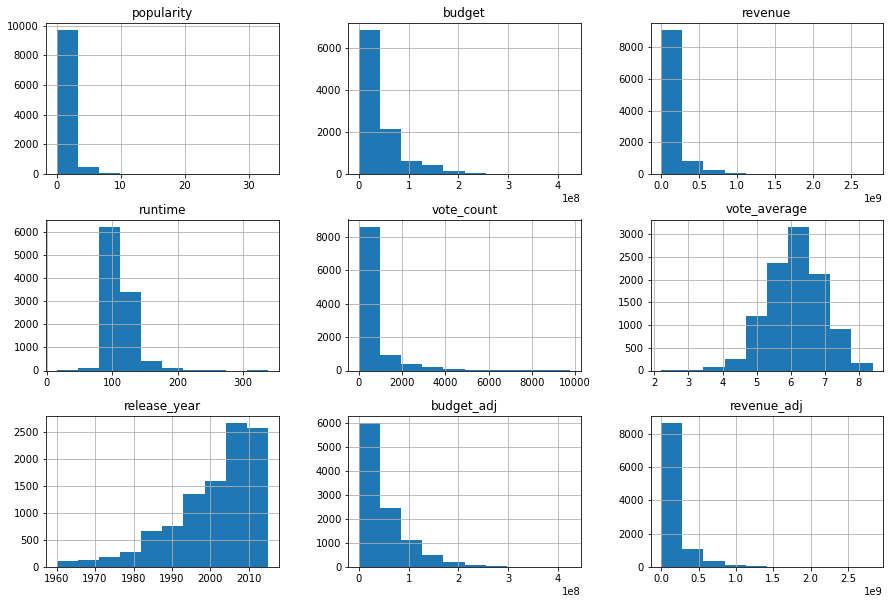

In [33]:
df.hist(figsize=(15,10));

### Research Question 1 Which genres are most popular ?

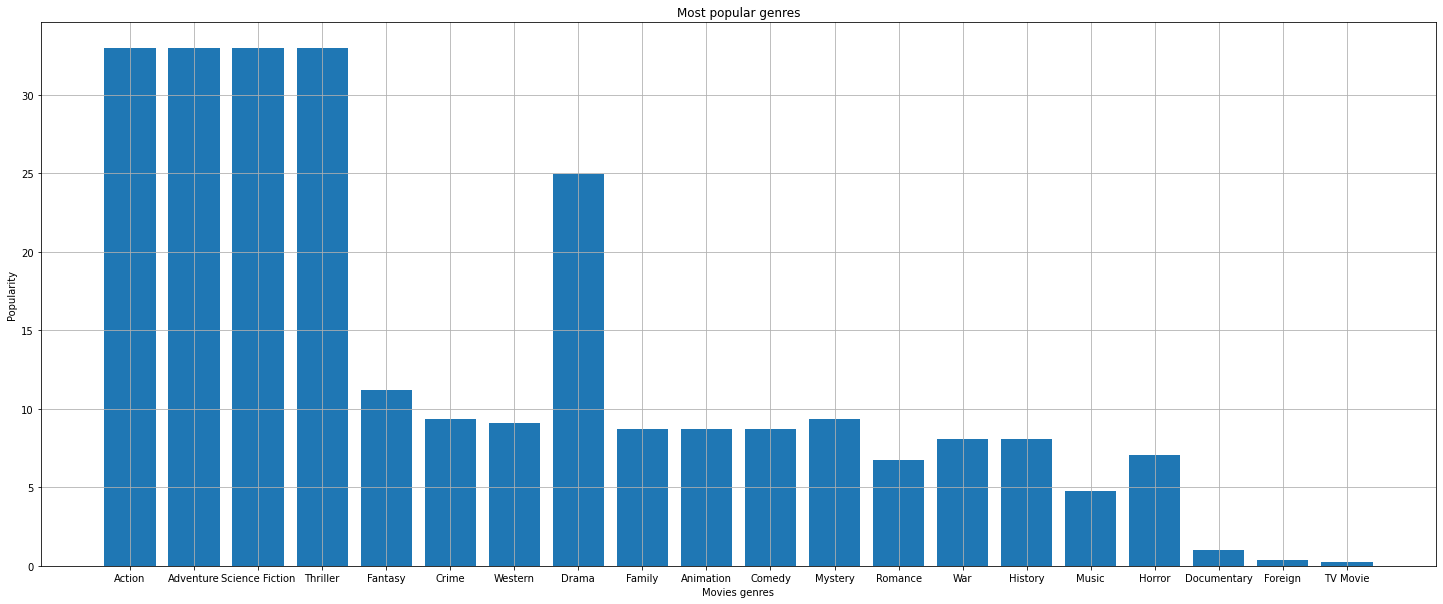

In [34]:
# plot the bargraph for each genre and most popularity for each genre
plt.subplots(figsize=(25, 10))
plt.bar(df['genres'], df['popularity'])
plt.xlabel('Movies genres')
plt.ylabel('Popularity')
plt.title('Most popular genres')
plt.grid(True);


It seems that Action, adventure, Science Fiction, and Thriller are the most popular genres <br/>
But this genres might be genres for very popular movie so question 2 might give us better result

### Research Question 2 Which genres are on average most popular ?

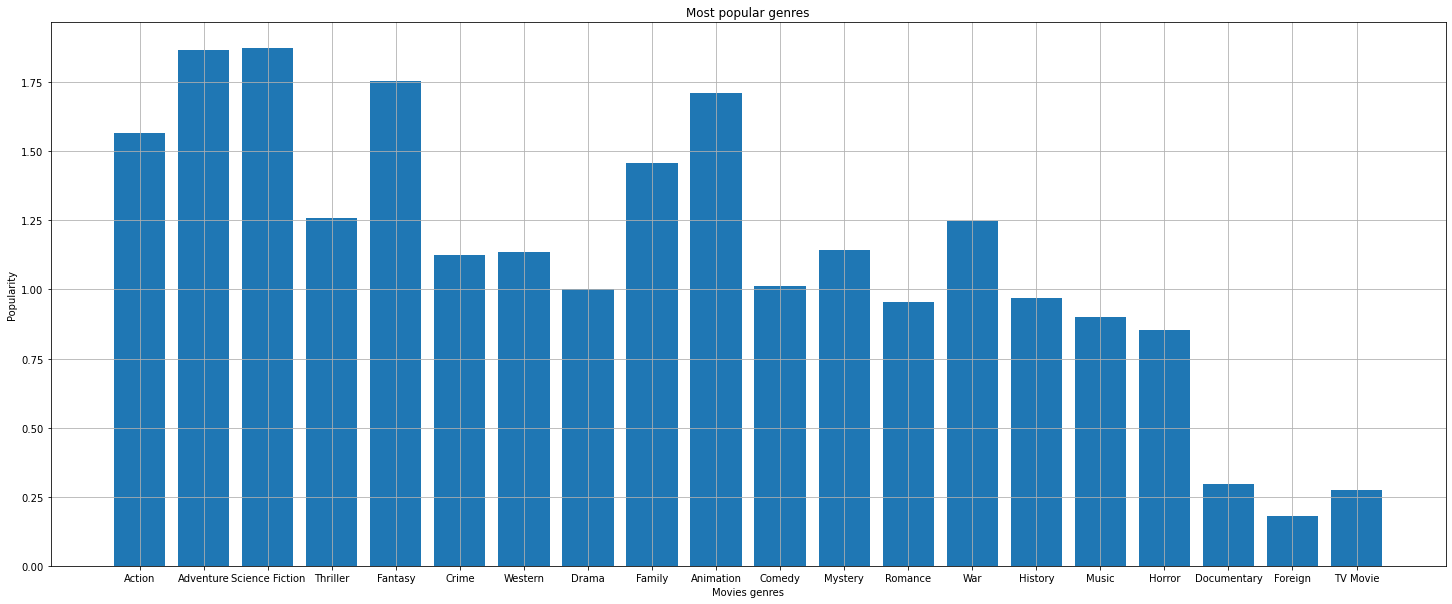

In [35]:
# plot the bargraph for each genre and most popularity for each genre
plt.subplots(figsize=(25, 10))
genre_mean_popularity = df.groupby(['genres'], sort=False)['popularity'].mean()
plt.bar(genre_mean_popularity.index, genre_mean_popularity)
plt.xlabel('Movies genres')
plt.ylabel('Popularity')
plt.title('Most popular genres')
plt.grid(True);

 Unlike the first question this show adventure and science fiction are on average are the most popular genres 

### Research Question 3  What kinds of properties are associated with movies that have high revenues?

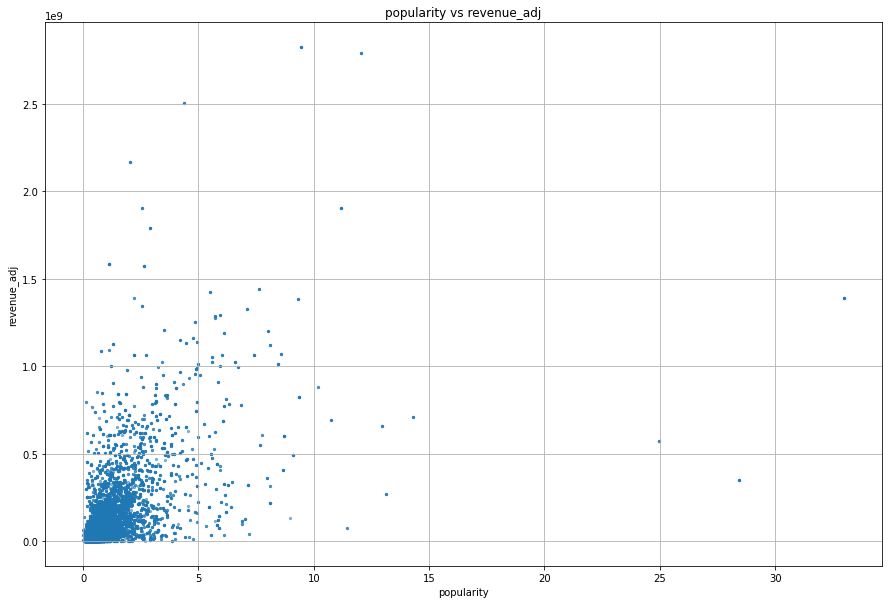

In [36]:
# Scatter plot to view the relation with popularity and revenue
scatter_plot('popularity', 'revenue_adj')

> This scatter plot shows the revenue and popularity of the movies based on this plot there are no storng correlation

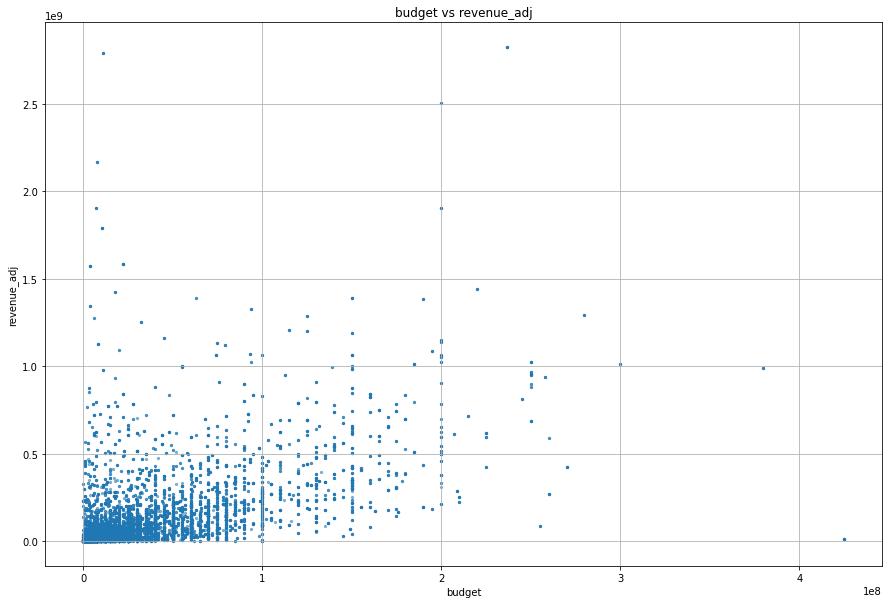

In [37]:
# Scatter plot to view the relation with budget and revenue
scatter_plot( 'budget', 'revenue_adj')

> This scatter plot shows the revenue and budget of the movies based on this plot there are minor postive correlation

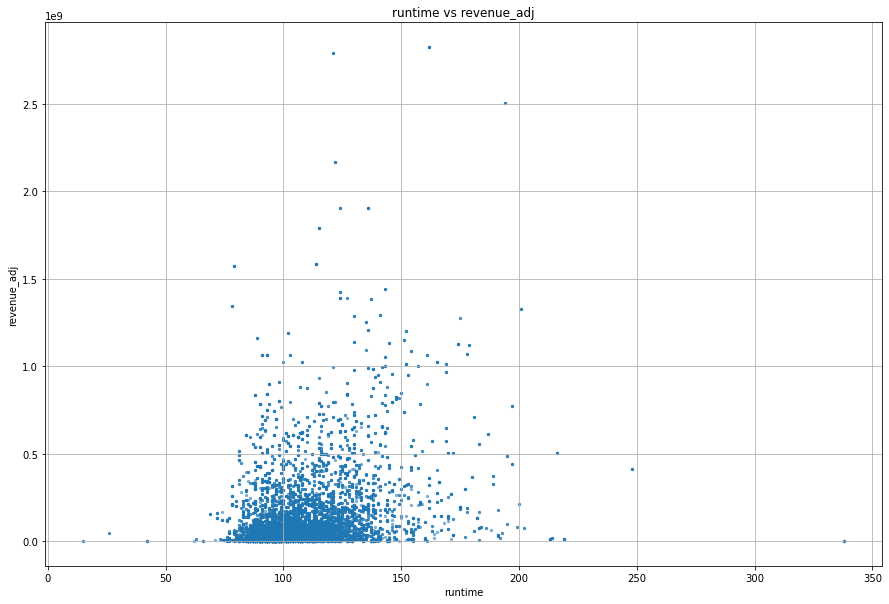

In [38]:
# Scatter plot to view the relation with runtime and revenue
scatter_plot('runtime', 'revenue_adj')

>This scatter plot shows the revenue and runtime of the movies based on this plot movies should be between 90 min and 130 to generate more revenue

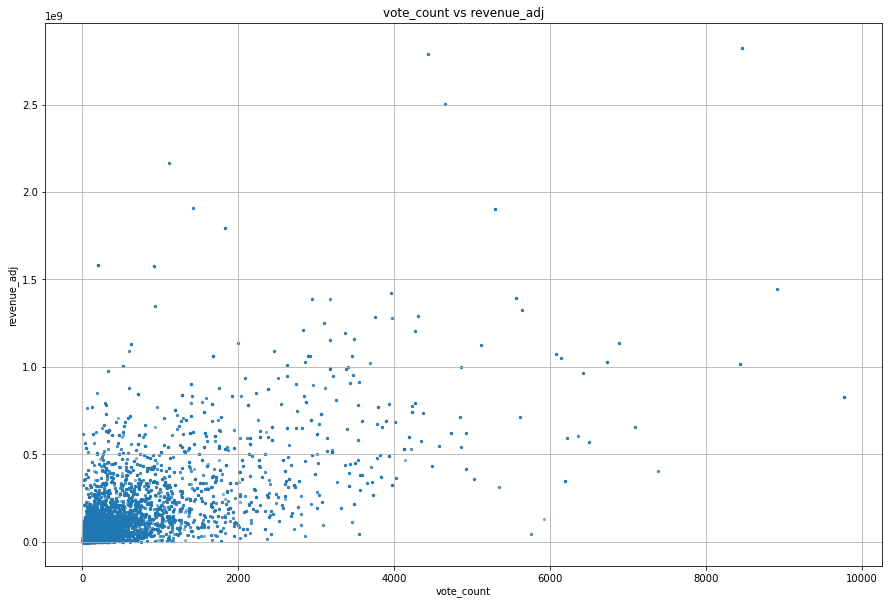

In [39]:
# Scatter plot to view the relation with vote_count and revenue
scatter_plot('vote_count', 'revenue_adj')

> This scatter plot shows the revenue and vote count of the movies based on this plot there are minor postive correlation

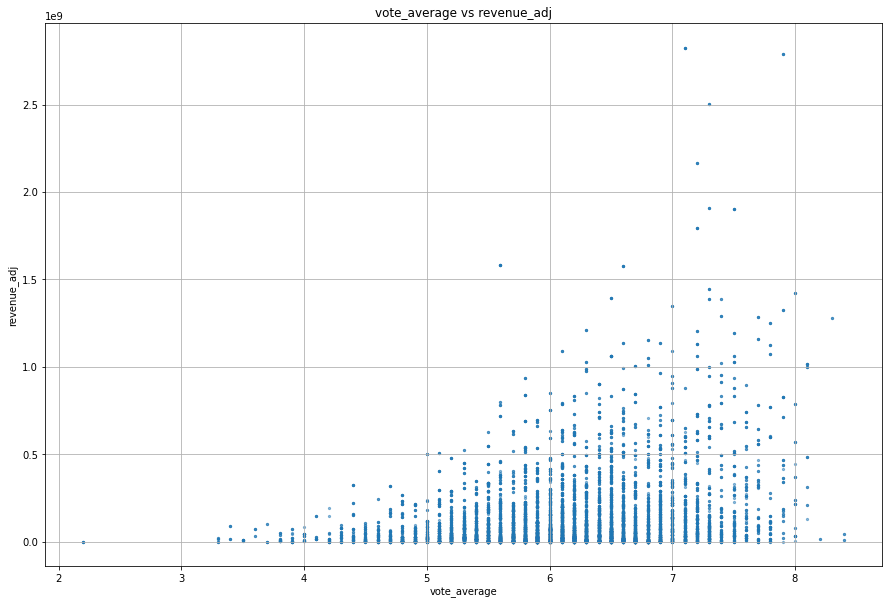

In [40]:
# Scatter plot to view the relation with vote average and revenue
scatter_plot('vote_average', 'revenue_adj')

> This scatter plot shows the revenue and vote average of the movies based on this plot there are strong postive correlation


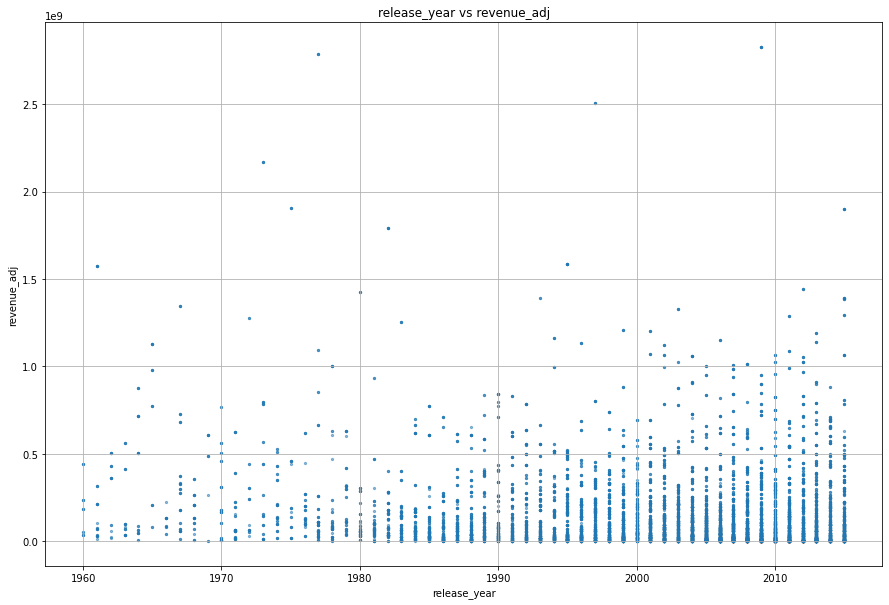

In [41]:
# Scatter plot to view the relation with release year and revenue
scatter_plot('release_year', 'revenue_adj')

> This scatter plot shows the revenue and release year of the movies based on this plot there are strong postive correlation

Release year have positive correlation with revenue same with vote average, vote count, budget, and the movies should be have runtime of 90-130

### Research Question 4 Does more movies being produced  each year ?

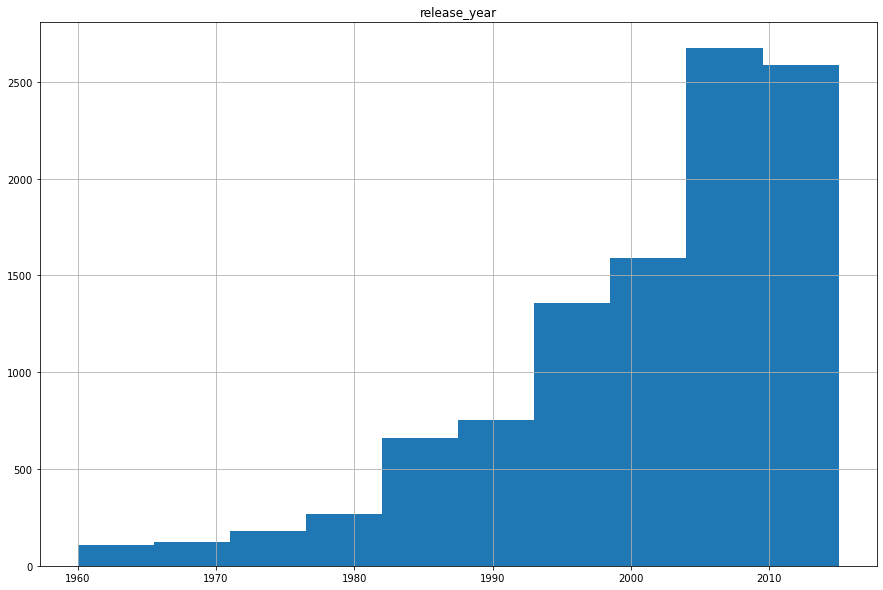

In [42]:
# histogram that shows how many years being produced each year
df.hist('release_year', figsize=(15,10));

Definitely more movies are produced the chart is skewed to the left

<a id='conclusions'></a>
## Conclusions
> The dataset have about 10k rows but after the cleaning only left with about 3k useful rows unfortunately the dataset have many fields with zeros this might significantly influence the results because I had to drop the 7k rows to get clean data I thought to replace the zeros with the mean but the rows is much more than the useful rows. <br/>
> I hoped to use the cast column to see if the casts influenced the movie but unfortunately the cast column used special characters on the names of the casts.
> There are genres that are most popular than other genres I found that Action, Adventure, Science Fiction, and Thriller are the most popular genres, but as I found in the second question that Adventure, and Science Fiction are on average the most popular genres<br/>
> There are many properties that is associated with movies that have high revenues such as the year the movie is released, the average vote of the movie, vote count, and the movies should be have runtime of 90-130.
